In [1]:
from collections import defaultdict

import utility
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import statistics 

In [2]:
input_file = '30synthetic_moraca_experiment_sr_TWA_generator_normal_prior_normal.csv'

input = {
    #20: 'housing20time.csv',
    #30: 'housing30time.csv',
    'simple': '30synthetic_moraca_experiment_simple_TWA_generator_normal_prior_normal.csv',
    'smart': '30synthetic_moraca_experiment_smart_TWA_generator_normal_prior_normal.csv',
    'sr': '30synthetic_moraca_experiment_sr_TWA_generator_normal_prior_normal.csv',
    'sh': '30synthetic_moraca_experiment_sh_TWA_generator_normal_prior_normal.csv',
}

# Functions below try to retrieve the informations which they need using regex on input_file. If they failed
# than variabile will be initialized with value in except part
try:
    family = utility.get_family_name(input_file)
except:
    family = 'housing'
    
try:
    generator_prior = get_generator_prior(input_file)
except:
    generator_prior = 'generator_uniform_prior_uniform'
    
try:
    item_count = utility.get_item_count(input_file)
except:
    item_count = 30

In [3]:
filters, recommenders, vois, data = utility.read_input_files(input)
vois = [" Vals"]
recommenders = [" Valr"]

max_finders = ["simple", "smart", "sr", "sh"]

voiName = utility.get_voi_name()
filterName = utility.get_filter_name()
recName = utility.get_rec_name()
finderName = utility.get_finder_name()
voiStyle = utility.get_voi_style()
filterStyle = utility.get_filter_style()
finderStyle = utility.get_finder_style()
recStyle = utility.get_rec_style()
queriesList = utility.get_queries_list(data)
    
voiAccuracyDict = utility.calculate_relative_utility_for_each_recommendation(data)

resultDict = defaultdict(list) 
for maxFinder,v in voiAccuracyDict.items():
    for u,z in voiAccuracyDict[maxFinder].items():
        resultDict[u+(maxFinder,)].append(u[0])
        resultDict[u+(maxFinder,)].append(u[1])
        resultDict[u+(maxFinder,)].append(u[2])
        resultDict[u+(maxFinder,)].append(u[3])
        resultDict[u+(maxFinder,)].append(maxFinder)
        resultDict[u+(maxFinder,)].append(statistics.mean(voiAccuracyDict[maxFinder][u]))


#Creo il dataframe di output
result = pd.DataFrame.from_dict(resultDict, orient='index', 
                                columns=['recommender', 'filter', 'selector', 'query_n', 'max_finder',
                                         'average_relative_utility'])    

print(result)

                                recommender filter selector  query_n  \
( Prbr,  TWA,  Prbs, 1, simple)        Prbr    TWA     Prbs        1   
( ReVr,  TWA,  ReVs, 1, simple)        ReVr    TWA     ReVs        1   
( Prbr,  TWA,  TTEs, 1, simple)        Prbr    TWA     TTEs        1   
( ReVr,  TWA,  TTEs, 1, simple)        ReVr    TWA     TTEs        1   
( Valr,  TWA,  TTEs, 1, simple)        Valr    TWA     TTEs        1   
( Valr,  TWA,  Vals, 1, simple)        Valr    TWA     Vals        1   
( Prbr,  TWA,  Prbs, 2, simple)        Prbr    TWA     Prbs        2   
( ReVr,  TWA,  ReVs, 2, simple)        ReVr    TWA     ReVs        2   
( Prbr,  TWA,  TTEs, 2, simple)        Prbr    TWA     TTEs        2   
( ReVr,  TWA,  TTEs, 2, simple)        ReVr    TWA     TTEs        2   
( Valr,  TWA,  TTEs, 2, simple)        Valr    TWA     TTEs        2   
( Valr,  TWA,  Vals, 2, simple)        Valr    TWA     Vals        2   
( Prbr,  TWA,  Prbs, 3, simple)        Prbr    TWA     Prbs     

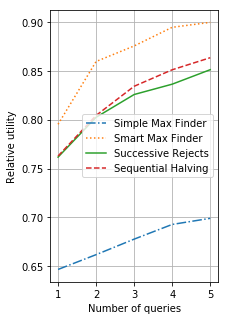

In [4]:
for filt in filters:
    for recom in recommenders:
        for voi in vois:
            fig = plt.figure(figsize=(3,5))
            ax = fig.subplots()
            new_plot = False
            for finder in max_finders:
                there_is_combination_of_filt_recom_voi_finder = False
                x_axis = [] 
                y_axis = [] 

                for index, row in result.iterrows():
                    if row["selector"] == voi and row["filter"] == filt and row['recommender'] == recom and row['max_finder'] == finder :
                        there_is_combination_of_filt_recom_voi_finder = True
                        new_plot = True
                        x_axis.append(row["query_n"])
                        y_axis.append(row["average_relative_utility"])
                    
                if there_is_combination_of_filt_recom_voi_finder:
                    indexLineStyle = list(filters).index(filt) + 1
                    ax.plot(x_axis, y_axis, label=finderName[finder.strip()], linestyle=finderStyle[finder.strip()])
            
            if new_plot:
                # Title of the Fig. 
                filename = "regret-fig-" + family +recom+voi+filt + "-" + generator_prior + "-max_finder.pdf"
                filename = filename.replace(" ", "-")
                ax.set(xlabel='Number of queries', xticks=queriesList, ylabel='Relative utility')
                ax.grid()
                ax.legend() # title="BIs"
                plt.ylim() # plt.ylim(bottom=0, top=60)
                plt.show()
                # Fig. generation
                fig.savefig(filename, pad_inches=0, bbox_inches='tight')